<a href="https://colab.research.google.com/github/ShubhamW248/SentimentAnalysis_LSTM_CNN/blob/main/IMDB_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB Movie Reviews Sentiment Analysis Using LSTM network

**Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

# For reproducibility
np.random.seed(7)


Loading Dataset

In [2]:
top_words = 5000  # Vocabulary size
max_review_length = 500  # Maximum review length

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

# Pad sequences to ensure uniform input length
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)


17464789/17464789 [==============================] - 0s 0us/step


## Model Design

In [3]:
embedding_vector_length = 128
dropout_rate = 0.5
lstm_units = 100

model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          640000    
                                                                 
 lstm (LSTM)                 (None, 100)               91600     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 731701 (2.79 MB)
Trainable params: 731701 (2.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [4]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

batch_size = 64
epochs = 10

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[early_stopping])


Epoch 1/10
391/391 - 721s - loss: 0.5010 - accuracy: 0.7467 - val_loss: 0.3452 - val_accuracy: 0.8565 - 721s/epoch - 2s/step
Epoch 2/10
391/391 - 719s - loss: 0.3154 - accuracy: 0.8741 - val_loss: 0.3149 - val_accuracy: 0.8700 - 719s/epoch - 2s/step
Epoch 3/10
391/391 - 702s - loss: 0.2743 - accuracy: 0.8922 - val_loss: 0.3413 - val_accuracy: 0.8593 - 702s/epoch - 2s/step
Epoch 4/10
391/391 - 700s - loss: 0.2341 - accuracy: 0.9084 - val_loss: 0.3436 - val_accuracy: 0.8484 - 700s/epoch - 2s/step
Epoch 5/10
391/391 - 714s - loss: 0.2142 - accuracy: 0.9170 - val_loss: 0.3357 - val_accuracy: 0.8774 - 714s/epoch - 2s/step


In [6]:
# Evaluate the model
scores = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy: {scores[1]*100:.2f}%")


Accuracy: 87.00%


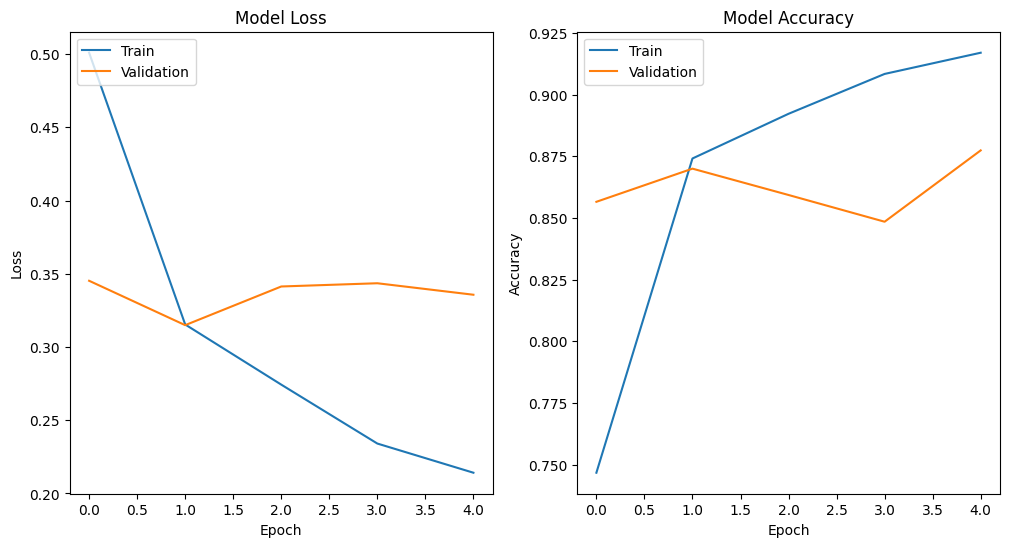

In [7]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
